In the English Premier League, May - July represents a lull period due
to the lack of club football. What makes up for it, is the intense
transfer speculation that surrounds all major player transfers today.
An important part of negotiations is predicting the fair market price
for a player. You are tasked with predicting this Market Value of a
player using the data provided below
The attached data set consists of the following attributes:

name: Name of the player

club: Club of the player

age : Age of the player

position : The usual position on the pitch

position_cat :
1 for attackers, 
2 for midelders, 
3 for defenders, 
4 for goalkeepers

market_value : As on transfermrkt.com on July 20th, 2017

page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017

fpl_value : Value in Fantasy Premier League as on July 20th,2017

fpl_sel : % of FPL players who have selected that player in their team

fpl_points : FPL points accumulated over the previous season

region: 
1 for England, 
2 for EU, 
3 for Americas, 
4 for Rest of World, 

nationality:

new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)

age_cat

club_id

big_club: Whether one of the Top 6 clubs

new_signing: Whether a new signing for 2017/18 (till 20th July)

You have learned about a number of regression algorithms in
your course: Linear Regression, Lasso Regression, Ridge
Regression, Nearest Neighbour Regression, Support Vector
Regression, Tree Regression, Random Forest Regression and
Gradient Boosted Regression.

Your Task is:
1. Use Seaborn to investigate the data and present your
ndings (20 marks)
2. Build models using all the algorithms above to predict
market_value (15 marks)
3. Tune the hyperparameters and build the most accurate
model (20 marks)
4. Use model selection approaches discussed in class to
choose the best model (10 marks)
5. Implement a Genetic Algorithm for learning attribute
weights for the Nearest Neighbour Algorithm. Implement at
least one mechanism for maintaining Diversity within the
Population (25 marks)
6. Deploy your model as a RESTful Web Service (10 marks)

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
dataset = pd.read_csv(r"C:\Users\rishi\Data_Set__1728922625-5ea65d4bfbba7875acb26a15 (1).csv")

In [3]:
dataset

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1


### Here, The market_value is the dependent variable which we need to predict

In [28]:
from sklearn.model_selection import train_test_split
training_dataset , test_dataset = train_test_split(dataset, test_size=0.2 , random_state= 25)

In [29]:
training_dataset

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
214,Philippe Coutinho,Liverpool,25,AM,1,45.00,2958,9.0,30.80%,171,3.0,Brazil,0,3,10,1,0
72,Tomer Hemed,Brighton+and+Hove,30,CF,1,2.50,253,5.0,0.40%,0,4.0,Israel,0,4,3,0,0
422,Matt Phillips,West+Brom,26,RW,1,9.00,454,6.0,5.60%,115,2.0,Scotland,0,3,19,0,1
242,Raheem Sterling,Manchester+City,22,LW,1,45.00,2074,8.0,3.80%,149,1.0,England,0,2,11,1,0
120,Joel Ward,Crystal+Palace,27,RB,3,5.00,154,5.0,0.60%,86,1.0,England,0,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Tammy Abraham,Swansea,19,CF,1,8.00,1227,5.5,3.30%,0,1.0,England,0,1,16,0,0
318,Shane Long,Southampton,30,CF,1,9.00,703,6.0,0.30%,57,2.0,Ireland,0,4,14,0,0
143,Wayne Rooney,Everton,31,SS,1,15.00,7664,7.5,20.90%,76,1.0,England,0,4,7,0,0
319,Sofiane Boufal,Southampton,23,AM,1,15.00,590,6.0,0.30%,40,4.0,Morocco,0,2,14,0,1


In [30]:
training_dataset.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,26.720109,2.146739,10.873098,765.654891,5.436141,54.752717,1.997283,0.043478,3.179348,10.198370,0.309783,0.149457
std,4.062915,0.990522,12.624412,965.234598,1.365944,52.514498,0.961092,0.204209,1.306203,5.854856,0.463033,0.357023
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,224.750000,4.500000,4.000000,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000
50%,27.000000,2.000000,6.000000,456.000000,5.000000,46.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,893.000000,5.500000,90.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [31]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 214 to 132
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          368 non-null    object 
 1   club          368 non-null    object 
 2   age           368 non-null    int64  
 3   position      368 non-null    object 
 4   position_cat  368 non-null    int64  
 5   market_value  368 non-null    float64
 6   page_views    368 non-null    int64  
 7   fpl_value     368 non-null    float64
 8   fpl_sel       368 non-null    object 
 9   fpl_points    368 non-null    int64  
 10  region        368 non-null    float64
 11  nationality   368 non-null    object 
 12  new_foreign   368 non-null    int64  
 13  age_cat       368 non-null    int64  
 14  club_id       368 non-null    int64  
 15  big_club      368 non-null    int64  
 16  new_signing   368 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 51.8+ KB


In [39]:
training_dataset.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [40]:
training_dataset[training_dataset['region'].isnull()]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing


In [41]:
training_dataset =training_dataset.dropna()

In [42]:
training_dataset[training_dataset['region'].isnull()]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing


In [50]:
age = np.array(training_dataset['age'])

In [51]:
age

array([25, 30, 26, 22, 27, 29, 23, 26, 24, 27, 24, 24, 25, 20, 28, 30, 31,
       31, 26, 28, 29, 28, 25, 24, 27, 21, 33, 30, 22, 29, 31, 26, 25, 31,
       32, 19, 21, 31, 26, 25, 26, 27, 25, 21, 27, 26, 24, 35, 25, 21, 23,
       28, 21, 27, 21, 20, 22, 23, 27, 33, 26, 26, 21, 23, 27, 34, 20, 28,
       23, 28, 26, 28, 31, 26, 22, 24, 24, 32, 37, 29, 24, 26, 22, 24, 30,
       24, 25, 30, 29, 26, 24, 28, 31, 25, 30, 28, 24, 30, 27, 30, 25, 29,
       30, 27, 29, 26, 26, 35, 21, 27, 25, 26, 31, 21, 26, 22, 23, 29, 36,
       30, 32, 32, 23, 24, 27, 28, 24, 28, 23, 28, 35, 25, 36, 24, 28, 19,
       25, 26, 31, 27, 27, 28, 22, 27, 30, 30, 24, 34, 26, 33, 25, 30, 34,
       25, 28, 29, 23, 25, 31, 31, 32, 32, 31, 27, 33, 25, 26, 30, 28, 31,
       17, 27, 28, 20, 20, 32, 26, 26, 27, 28, 27, 22, 21, 26, 24, 28, 24,
       32, 27, 27, 22, 24, 33, 22, 32, 23, 30, 28, 29, 28, 25, 24, 28, 34,
       35, 28, 27, 25, 25, 27, 30, 33, 27, 27, 31, 28, 32, 27, 30, 26, 27,
       20, 25, 23, 21, 25

In [47]:
market_val = np.array(training_dataset['market_value'])

In [48]:
market_val

array([4.50e+01, 2.50e+00, 9.00e+00, 4.50e+01, 5.00e+00, 5.00e+00,
       2.20e+01, 5.00e+01, 1.50e+01, 1.00e+01, 1.20e+01, 1.70e+01,
       1.40e+01, 6.00e+00, 7.00e+00, 5.00e+00, 2.20e+01, 5.50e+00,
       4.50e+00, 5.00e+00, 2.80e+01, 5.50e+00, 5.00e+00, 1.20e+01,
       1.20e+01, 4.00e+00, 1.00e+00, 2.80e+01, 1.60e+01, 7.00e+00,
       1.00e+01, 1.00e+01, 1.00e+01, 1.50e+00, 2.50e+00, 5.00e+00,
       7.00e+00, 3.00e+01, 1.80e+01, 4.50e+00, 5.50e+00, 4.50e+00,
       1.80e+01, 4.00e+00, 6.00e+00, 1.00e+01, 2.50e-01, 5.00e-01,
       8.00e+00, 5.00e-01, 8.00e+00, 3.50e+01, 1.00e-01, 1.80e+01,
       5.00e-01, 4.00e+00, 2.00e+01, 2.20e+01, 6.00e+00, 7.00e+00,
       2.80e+01, 1.50e+01, 1.00e+01, 2.50e+01, 1.00e+01, 1.00e+00,
       5.00e+00, 1.70e+01, 5.00e+00, 1.50e+00, 5.00e+00, 5.00e+00,
       2.20e+01, 2.00e+00, 8.00e+00, 3.50e+01, 3.00e+00, 9.00e+00,
       1.00e+00, 3.50e+00, 5.00e+00, 2.50e+00, 1.50e+01, 1.80e+01,
       7.00e+00, 8.00e+00, 5.50e+00, 1.80e+01, 1.50e+00, 6.50e

In [62]:
# Here, we want to determine whether there exists any linear correlation between the age and the dependent variable market value
# pearsonr performs a hypothesis testing for the same 
# H0: There exists no correlation between the variables or relationships being studied
# H1: There exists some correlation i.e. either positive or negative between the variables or relationships being studied

from scipy.stats import pearsonr

stats, p_value = pearsonr(age,market_val)

# print('Pearsons correlation: %.3f' % p_value)
print(f"stats: {stats}, p-value: {p_value}" )

stats: -0.13486523312748985, p-value: 0.00959185344396843


In [64]:
# here p-value < 0.05 , we have a moderately strong evidence against the H0 that age will have a linear correlation with the market_value.
# However, there exist a negative linear correlation between the age and market value

In [59]:
page_views = np.array(training_dataset['page_views'])
page_views

array([2958,  253,  454, 2074,  154,  458,  950, 4042,  402,  472,  238,
        742,  808,  243,  208,  504,  912,  427,  235,  170, 1500,  341,
        561,  396,  394,  474,  171,  511, 1011,  287,  633,  201,  397,
         88,  186, 1387,  666, 1434, 2537,  265,  177,  290, 1759,  806,
        347,  407,   63,   70,  997,   83,  368,  756,  395,  845,  157,
        460,  947, 1519,  215,  867, 1661, 1521, 1812, 1239,  214,  218,
        344,  458,  516,   82,  588,  317,  935,  174,  258, 1815,  437,
        285,  436,  313,  764,  180,  416,  428,  425,  488,  164, 1161,
         97,    3,  618,   84,  152,  676,  154,  327, 7435,  428,  273,
        305, 1117,  236,  165,  502,  336,  693, 1040,  255,  288,  708,
        337,   82,  134,  615, 2252,  168, 1253, 1210,  195,  169,  698,
        936,  139,  385,  187,  874,  748, 2055, 1413,  896,  542,  352,
       2656,   85, 4395,  279,  432, 1002, 1824,  834,  489,  110,  977,
        114,  849,  295,   52,  100,   22,  252, 12

#### CHECKING FOR CORRELATION BETWEEN MARKET_VALUE AND PAGE_VIEWS

In [66]:
# H0: There exists no correlation between the variables or relationships being studied
# H1: There exists some correlation i.e. either positive or negative between the variables or relationships being studied

stats, p_value = pearsonr(market_val,page_views)
print(f"stats: {stats}, p-value: {p_value}" )

# Here, stats i.e. correlation coefficient states that there is high correlation between market_value and page_views 
# also p-value << 0.05 , there is a strong evidence against the Null Hypothesis and we can say there exist a linear relationship between the value and page_views

stats: 0.7485738800523873, p-value: 2.697855575575841e-67


In [68]:
# H0: There exists no correlation between the variables or relationships being studied
# H1: There exists some correlation i.e. either positive or negative between the variables or relationships being studied

fpl_value = np.array(training_dataset['fpl_value'])

stats, p_value = pearsonr(market_val,fpl_value)
print(f"stats: {stats}, p-value: {p_value}" )

# # Here, stats i.e. correlation coefficient states that there is high correlation between market and fpl_value
# also p-value << 0.05 , there is a strong evidence against the Null Hypothesis and we can say there exist a linear relationship between the market_value and fpl_value

stats: 0.8028221719007536, p-value: 3.258684996620364e-84


In [70]:
# H0: There exists no correlation between the variables or relationships being studied
# H1: There exists some correlation i.e. either positive or negative between the variables or relationships being studied

big_club = np.array(training_dataset['big_club'])

stats, p_value = pearsonr(market_val,big_club)
print(f"stats: {stats}, p-value: {p_value}" )

# # Here, stats i.e. correlation coefficient states that there is high correlation between market and fpl_value
# also p-value << 0.05 , there is a strong evidence against the Null Hypothesis and we can say there exist a linear relationship between the market_value and fpl_value

stats: 0.5764287058363129, p-value: 5.738169063011955e-34


In [72]:
# H0: There exists no correlation between the variables or relationships being studied
# H1: There exists some correlation i.e. either positive or negative between the variables or relationships being studied

club_id = np.array(training_dataset['club_id'])

stats, p_value = pearsonr(market_val,club_id)
print(f"stats: {stats}, p-value: {p_value}" )

# # Here, stats i.e. correlation coefficient states that there is high correlation between market and fpl_value
# also p-value << 0.05 , there is very weak evidence against the Null Hypothesis and we can say there exist np linear relationship between the market_value and club_id

stats: -0.05750233959898616, p-value: 0.2712258480697088


In [75]:
# H0: There exists no correlation between the variables or relationships being studied
# H1: There exists some correlation i.e. either positive or negative between the variables or relationships being studied

fpl_point = np.array(training_dataset['fpl_points'])

stats, p_value = pearsonr(market_val,fpl_point)
print(f"stats: {stats}, p-value: {p_value}" )

# # Here, stats i.e. correlation coefficient states that there is high correlation between market and fpl_value
# also p-value << 0.05 , there is a strong evidence against the Null Hypothesis and we can say there exist a linear relationship between the market_value and fpl_points

stats: 0.6098105571127272, p-value: 7.515174703597075e-39


#### Correlation 


Market_value : age =         stats: -0.13486523312748985, p-value: 0.00959185344396843

Market_value : page_views =  stats: 0.8028221719007536, p-value: 3.258684996620364e-84

Market_value : fpl_value =   stats: 0.8028221719007536, p-value: 3.258684996620364e-84

Market_value : fpl_points =  stats: 0.6098105571127272, p-value: 7.515174703597075e-39

Market_value : big_club =    stats: 0.5764287058363129, p-value: 5.738169063011955e-34

Market_value : club_id =     stats: -0.05750233959898616, p-value: 0.2712258480697088

In [80]:
# we can clearly see from above that club_id has no correlation with market_value. So, we are dropping it.
df = pd.DataFrame(training_dataset)
df = df.drop(columns=['club_id'])
df

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,big_club,new_signing
214,Philippe Coutinho,Liverpool,25,AM,1,45.00,2958,9.0,30.80%,171,3.0,Brazil,0,3,1,0
72,Tomer Hemed,Brighton+and+Hove,30,CF,1,2.50,253,5.0,0.40%,0,4.0,Israel,0,4,0,0
422,Matt Phillips,West+Brom,26,RW,1,9.00,454,6.0,5.60%,115,2.0,Scotland,0,3,0,1
242,Raheem Sterling,Manchester+City,22,LW,1,45.00,2074,8.0,3.80%,149,1.0,England,0,2,1,0
120,Joel Ward,Crystal+Palace,27,RB,3,5.00,154,5.0,0.60%,86,1.0,England,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Tammy Abraham,Swansea,19,CF,1,8.00,1227,5.5,3.30%,0,1.0,England,0,1,0,0
318,Shane Long,Southampton,30,CF,1,9.00,703,6.0,0.30%,57,2.0,Ireland,0,4,0,0
143,Wayne Rooney,Everton,31,SS,1,15.00,7664,7.5,20.90%,76,1.0,England,0,4,0,0
319,Sofiane Boufal,Southampton,23,AM,1,15.00,590,6.0,0.30%,40,4.0,Morocco,0,2,0,1


In [87]:
# Helps to get the number of unique values 
df['club'].nunique()

20

In [90]:
# Helps to get the frequency of each unique value 
un = df['club'].value_counts()

Now, we want to identify if the clubs are affecting the market_values of each player.

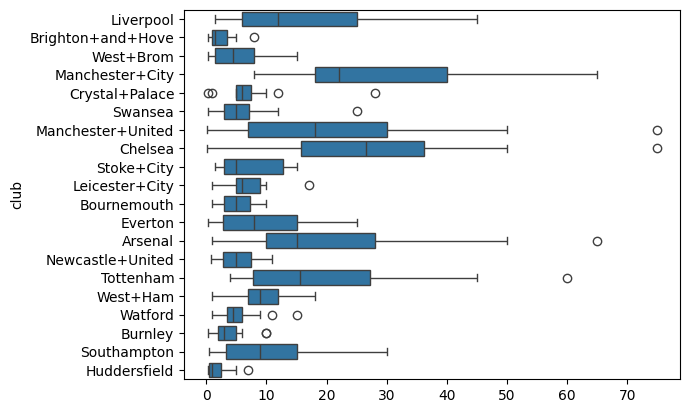

<Figure size 10000x10000 with 0 Axes>

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.kdeplot(x=market_val,y=training_dataset['club'])
# sns.kdeplot(x=market_val,y=un)
sns.boxplot(x=market_val,y=training_dataset['club'])
plt.figure(figsize=(100,100))
# plt.figimage()
plt.show()



### Clubs are affecting the market value of players

<Axes: ylabel='region'>

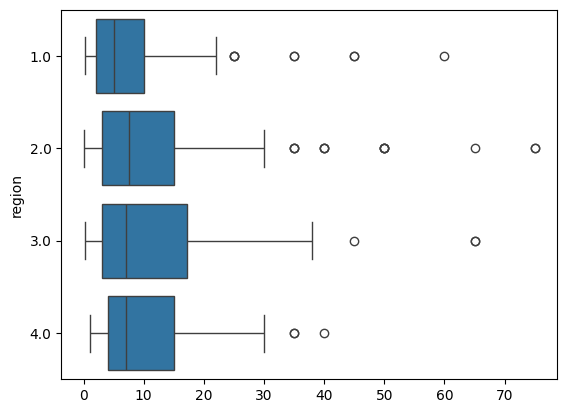

In [115]:
sns.boxplot(x=market_val,y=training_dataset['region'],orient='h')

In [118]:
# H0: The mean market_values of each category is equal.
# H1: The mean market_values of each category is not equal.
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('market_value ~ C(region)',data = training_dataset).fit()
anova_result = sm.stats.anova_lm(model,typ = 2)
print(anova_result)

                 sum_sq     df         F    PR(>F)
C(region)   1521.853495    3.0  3.241261  0.022196
Residual   56969.055173  364.0       NaN       NaN


pvalue = 0.022196
0.01 < pvalue < 0.05, so there is a moderate evidence against the H0 ,and it is less likely that the observed difference has occured by chance

In [119]:
# We can perfrom the CHI - SQUARE TEST FOR INDEPENDENCE 
# Where, H0: 